# TP 5 : Spectroscopie 3D par transformée de Fourier en astronomie

Thomas Martin: thomas.martin.1@ulaval.ca

Philippe Després: philippe.despres@phy.ulaval.ca

## Introduction

### SITELLE

<img src="http://celeste.phy.ulaval.ca/links/tp1/sitelle.png" alt="SITELLE" title="SITELLE au CFHT" width=300/>

SITELLE est un spectro-imageur à transformée de Fourier (Drissen et al. 2019, https://arxiv.org/pdf/1811.06644.pdf) installé au téléscope Canada-France-Hawaii depuis 2015. Il a été conçu et construit dans le cadre d'une collaboration entre le Pr. Laurent Drissen (Université Laval) et la firme québecoise ABB-Bomem (Québec). Cet instrument unique en son genre permet d'obtenir un spectre pour chaque pixel d'une image d'environ 2000x2000 pixels soit 4 millions de spectres en une seule observation. Au coeur de cet instrument se trouve un interféromètre de Michelson dont une représentation très simplifiée est donnée ci-dessous.

### Principe de fonctionnement 

<img src="michelson.png" alt="Michelson" title="Michelson" width=300/>

D'une manière générale, un interféromètre est un montage optique qui permet d'obtenir l'équivalent de la transformée de Fourier **inverse** du spectre de la source observée : un **interférogramme**. La transformée de Fourier **directe** de l'interférogramme obtenu permet ensuite de retrouver le contenu spectral (le spectre) de la source de lumière observée. 

Dans un interféromètre de Michelson, la lumière de la source est séparée au niveau de la lame  séparatrice (qui est une lame semi-réléchissante) en deux faisceaux : une moitié est transmise à travers la lame et se dirige vers le miroir mobile, tandis que l'autre est réfléchie sur la lame pour être dirigée vers le miroir fixe. Les deux miroirs réfléchissent à nouveau ces deux faisceau pour les faire interférer au niveau de la lame semi-réfléchissante. Des deux faisceaux résultant de cette interférence, l'un retourne vers la source tandis que l'autre est dirigée vers une caméra. Si $x$ est la différence de marche optique entre les deux faisceaux réfléchis par les miroirs, le résultat de l'interférence est un signal dont l'amplitude $I(x)$ s'écrit comme la transformée de Fourier inverse du spectre $S(\sigma)$ de la source:

(1) $I(x) = \int S(\sigma) e^{2i\pi \sigma x} \text{d}\sigma$

Notez bien que le spectre est établi en fonction du **nombre d'onde** $\sigma$. Un nombre d'onde est l'équivalent d'une fréquence est s'écrit simplement comme l'inverse d'une longueur d'onde $\lambda$ : $\sigma = \frac{1}{\lambda}$. Dans le cadre de ce TP, l'unité utilisée pour les nombres d'onde est le cm$^{-1}$. Pour votre information lorsque $\lambda$ est donné en nm, $\sigma [\text{cm}^{-1}]= 10^7 / \lambda [\text{nm}]$.

Pour échantillonner un interférogramme, le miroir mobile est déplacé pas par pas tandis que le miroir fixe reste à la même distance de la séparatrice. De cette façon, la différence de marche entre les deux faisceaux est modifiée (donc $x$ change) et l'on est en mesure d'échantillonner l'interférogramme (vous trouverez plus bas deux exemples d'interférogrammes obtenus en observant le ciel nocturne et en observant une région de la nébuleuse M57). La transformée de Fourier directe de l'interférogramme obtenu permet théoriquement de retrouver le spectre de la source observée :

(2) $S(\sigma) = \int I(x) e^{-2i\pi \sigma x} \text{d}x$

La caméra possède un grand nombre de pixel et il est donc possible d'obtenir un interférogramme pour chaque source située dans son champ de vue, d'où la qualification de spectromètre-imageur d'un instrument comme SITELLE. La lumière de ces sources est à un angle d'incidence $\theta$ de l'axe optique. Dans le cas de SITELLE, et pour des raisons qui dépassent le cadre de ce TP, aucune source n'est observée le long de l'axe optique. La carte de l'angle d'incidence $\theta$ est donnée plus bas.


### Données

À chaque position du miroir mobile (on parle de "pas"), une image interférométrique est obtenue sur la caméra. Une observation est la réunion des images prisent à chaque pas du miroir mobile sous la forme d'un **cube de données interférométriques**. Les 4 millions d'interférogrammes obtenus sont ensuite transformés en autant de spectres pour produire un **cube spectral** (on parle de données hyperspectrales).

<img src="sitelle-data.png" alt="Cubes" title="Les données de SITELLE" width=800/>

Nous allons travailler sur une sous-section d'un cube de données obtenu en 2015 sur la nébuleuse planétaire M57 (https://fr.wikipedia.org/wiki/N%C3%A9buleuse_de_la_Lyre). Ce cube de données a fait l'objet d'un article (Martin et al, 2016 https://arxiv.org/pdf/1608.05854.pdf). Vous allez devoir transformer le cube interférométrique en un cube spectral et reproduire les principaux résultats de cette étude. Le cube a été réduit (pré-traité) pour vous, question d'enlever quelques étapes critiques mais laborieuses dans le traitement des données brutes (par ex. détermination du flux, suppression des rayons cosmiques).

Voici l'image profonde (*deep frame*) obtenue lorsque toutes les images interférométriques sont sommées. Comme vous le voyez, la nébuleuse planétaire occupe le centre du champ. On distingue même, au centre de celle-ci, la naine blanche dont le rayonnement ultraviolet excite le gaz environnant et qui est à l'orgine de la nébuleuse. Comme chaque pixel de cette image est relié à un spectre, nous pouvons donc étudier les spectres des étoiles, du ciel environnant et bien sûr de chaque région de la nébuleuse.

<img src="df.png" alt="Dee frame" title="Image profonde" width=700/>

Plus bas vous trouverez un interférogramme du 'ciel' et le spectre associé qui présente un continu (émission thermique de corps noir) et des raies d'émission (émission de fluorescence). L'absence de signal à droite et à gauche du spectre est lié à la présence d'un filtre optique devant l'instrument (délimité par les lignes oranges). À l'intérieur du filtre, on observe du signal à toutes les longueurs d'onde, ce qui n'est pas le cas du spectre de la nébuleuse où l'on n'observe de l'émission qu'à 5 longueurs d'onde particulières : ce sont les 5 raies d'émission produites par la désexcitation des atomes du milieu interstellaire ionisés par la naine blanche (hydrogène, azote et soufre).

<img src="exemples_raies.png" alt="Raies d'émission" title="" width=1000/>

## Transformation des données interférométriques

### Chargement du cube de données

Le cube avec lequel vous allez travailler est sauvegardé au format FITS. C'est un format commun en astronomie. Vous pouvez y accéder en utilisant la librairie astropy (https://www.astropy.org/). Ce cube contient 593 images interférométriques de 775 x 773 pixels. Une fois chargé, ce cube se présente sous la forme d'un tableau numpy.ndarray 3D. Attention, ici le format FITS est historiquement lié au langage FORTRAN et l'arrangement des données en mémoire est différent de ce qui est fait normalement avec NumPy, qui par défaut organise les données selon un ordre qualifié de *row-major* (paramètre *order='F'* passé lors de la création du *numpy.ndarray*: row-major (C-style) vs column-major (Fortran-style) order).

In [1]:
import numpy as np
import pylab as pl
import astropy.io.fits
import scipy
import scipy.optimize
import tplib # librairie de fonctions utiles
from importlib import reload
import numpy as np

In [2]:
cube_interf = astropy.io.fits.getdata('M57_cube.fits')
cube_interf.shape

(593, 773, 775)

### Extraction d'un interférogramme du ciel

Commençons par extraire un interférogramme du ciel, en choissisant un pixel à la coordonnée (15,15) qui est en dehors de la zone couverte par la nébuleuse. 

Text(0.5, 0, 'index du pas')

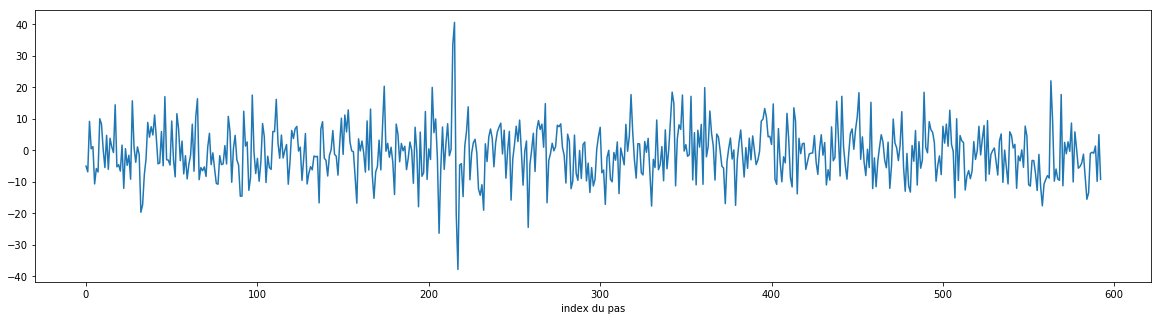

In [3]:
sky_interf = cube_interf[:,15,15]
pl.figure(figsize=(20,5))
pl.plot(sky_interf)
pl.xlabel("index du pas")

Cet interférogramme est plutôt bruité. Pour augmenter le rapport signal-sur-bruit, nous allons calculer la moyenne  des inteférogrammes obtenus sur une surface de 30x30 pixels (autour du pixel 15,15) dans une région exempte d'émission nébulaire.

Text(0.5, 0, 'index du pas')

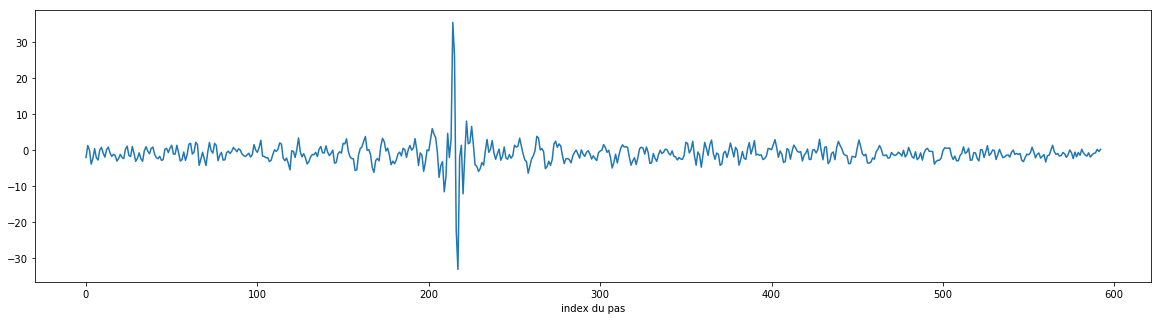

In [4]:
sky_interf = np.mean(cube_interf[:,:30,:30], axis=(1,2))
pl.figure(figsize=(20,5))
pl.plot(sky_interf)
pl.xlabel("index du pas")

### Transformation de Fourier

La transformation de Fourier directe repose sur l'implémentation de l'équation (2) en version discrète. Sous une forme naïve, cette équation est particuliérement longue à calculer, mais il existe une implémentation rapide, la FFT (Fast Fourier Transform) qui permet d'accélérer substantiellement les calculs. Avec la routine *numpy.fft.fft*, le vecteur complexe obtenu en sortie est de même dimension que l'interférogramme en entrée. 

**Question 1** - Obtenez le spectre de la portion 'ciel' avec  *numpy.fft.ftt* (en utilisant l'interférogramme moyenné calculé précédemment). Historiquement, les routines FFT placent la fréquence 0 dans le premier élément du vecteur de sortie, puis les fréquences positives croissantes dans la première moitié de ce vecteur et les fréquences négatives décroissantes (en valeur absolue) dans la deuxième moitié. Une façon de ramener dans un ordre plus naturel est d'utiliser *fftshift*, qui ramène le tout en ordre croissant avec la fréquence 0 au milieu. Affichez la partie réelle du vecteur de sortie, après l'application de *fftshift*. Prenez soin d'ajuster la ratio largeur/hauteur de votre graphique, par exemple avec *pylab.figure(figsize=(20,5))*.
Ne vous souciez pas pour l'instant des valeurs en abcisse sur votre graphique, nous y viendrons plus tard.






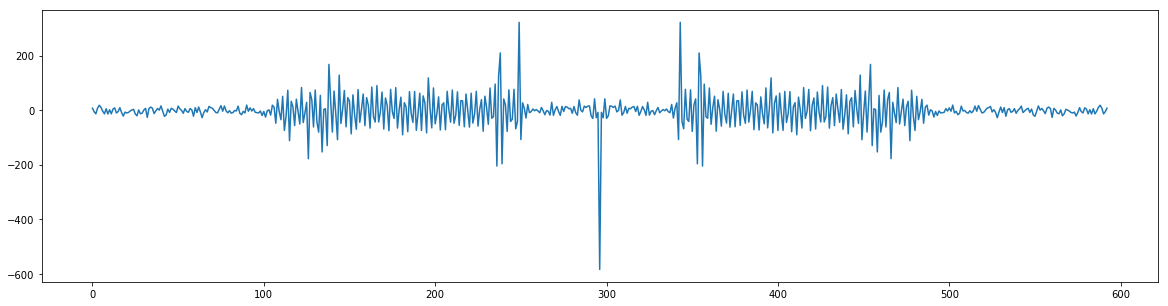

In [5]:
""" On illustre la partie réelle du spectre de l'interférogramme moyenné à l'aide de la transformée de Fourier. """

sky_fft = np.fft.fft(sky_interf)

# On ramène le spectre en ordre croissant avec la fréquence 0 au milieu
sky_fftshift = np.fft.fftshift(sky_fft)

pl.figure(figsize=(20, 5))
pl.plot(sky_fftshift.real)

**Question 2** - Si tout va bien, le spectre obtenu est symétrique. Pourquoi en est-il ainsi?


On remarque que le spectre de la transformée de Fourier de l'interférogramme de ciel est symétrique lorsqu'on affiche sa partie réelle. Cela s'explique par la forme de la transformée de Fourier directe qui permet d'obtenir le spectre soit l'équation 2. La formule d'Euler permet de réécrire l'équation 2 de la forme suivante pour des fréquences positives et négatives,

$ S(\sigma) = \int I(x) ( \cos(2\pi \sigma x) - i\cdot \sin(2 \pi \sigma x))\text{d}x,$

$ S(-\sigma) = \int I(x) (\cos(2\pi (-\sigma) x) - i\cdot \sin(2\pi (-\sigma) x)) \text{d}x = \int I(x) ( \cos(2\pi \sigma x) +
i\cdot \sin(2 \pi \sigma x))\text{d}x.$

On obtient donc un spectre symétrique lorsqu'on affiche la partie réelle et que la fréquence 0 est au milieu, puisque les parties imaginaires, pour des fréquences positives et négatives, sont déphasés de 90 degrés et de même amplitude. On dit donc que la partie réelle d'une transformée de Fourier est conjugué symétrique donc 

$S(-\sigma) = [S(\sigma)]^{*}.  $

**Question 3** -
Démontrez mathématiquement que le premier élément en sortie de *numpy.fft.fft* est simplement la somme des valeurs de l'interférogramme (calculez aussi cette somme et comparez-la à l'élément approprié à la sortie de *numpy.fft.fft*). Il s'agit en quelque sorte d'un décalage du signal (*offset*), dû par exemple à un courant de fuite au détecteur,  qui ne contient pas d'information utile. Aussi, vous pourriez simplement mettre cette valeur à 0 dans le vecteur de sortie. De façon équivalente, vous pourriez soustraire la moyenne de l'interférogramme (pour que sa somme soit nulle) et calculer à nouveau la FFT du nouvel interfégramme. C'est ce que vous ferez, en vérifiant que la composante à la fréquence 0 est bien nulle (dans les limites de la précision machine). Affichez le résultat (la partie réelle, après *fftshift*).

Premier élément en sortie de la FFT = -583.9161376953125
Somme des valeurs de l'interférogramme = -583.9161376953125
Comparaison =  True
 
Somme du nouvel intergérogramme = -0.0000
Valeur de la composante à la fréquence 0 =  0.0000


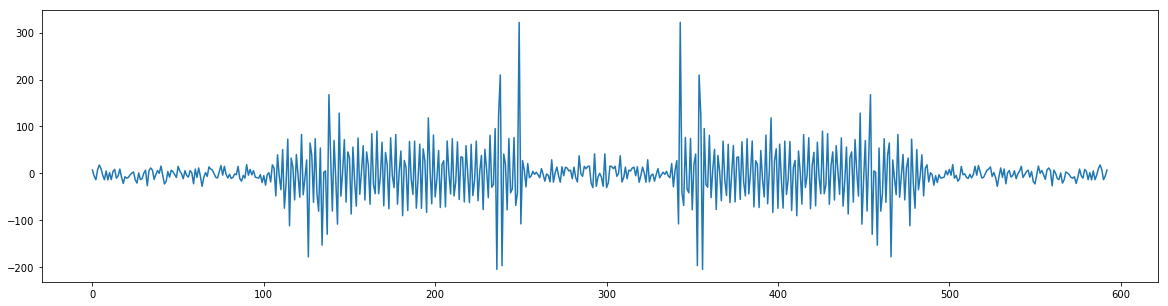

In [6]:
""" On détermine d'abord quel est le premier élément en sortie de la fft de l'interférogramme du ciel et on compare
    cette valeur à la somme des valeurs de l'interférogramme. """

first_elementFFT = np.real(sky_fft[0])
sum_interf = np.sum(sky_interf)

print('Premier élément en sortie de la FFT = {}'.format(first_elementFFT))
print("Somme des valeurs de l'interférogramme = {}".format(sum_interf))
print("Comparaison = ", first_elementFFT == sum_interf)
print(' ')



""" On soustrait la moyenne de l'interférogramme pour que sa somme soit nulle et on calcule à nouveau sa transformée
    de Fourier. """

sky_new_interf = sky_interf - np.mean(sky_interf)
sky_new_interf_fft = np.fft.fft(sky_new_interf)

sky_new_interf_fftshift = np.fft.fftshift(sky_new_interf_fft)

# On valide que la somme du nouvel interférogramme est bien nulle
print("Somme du nouvel intergérogramme = " "%.4f" % np.sum(sky_new_interf))


# On vérifie que la composante à la fréquence 0 est bien nulle
sky_new_freq0 = np.real(sky_new_interf_fft[0])
print("Valeur de la composante à la fréquence 0 = ", "%.4f" % sky_new_freq0)

# On trace la partie réelle de la transformée de Fourier du nouvel interférogramme
pl.figure(figsize=(20, 5))
pl.plot(sky_new_interf_fftshift.real)


Il reste à trouver à quoi correspondent les valeurs en abcisse qui jusqu'ici ne représentent que l'index du vecteur de sortie, ou le nombre $k$ dans la définition de la transformée de Fourier plus haut. Pour $n$ signaux échantillonnés avec un intervalle $d$, la fonction *numpy.fft.freq* retourne les fréquences correspondantes, qui sont (voir doc de la fonction)

$$freq = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)  $$ si $n$ est pair
ou
$$freq = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)  $$ si $n$  est impair. 
 
où vous remarquerez l'ordre utilisé pour des raisons historiques, qu'il est possible de changer facilement avec *fftshift*.
 
Dans le cas particulier de SITELLE, l'étalonnage du spectre en nombre d'onde n'est pas trivial et dépend de l'angle d'incidence $\theta$ de la lumière, autrement dit de la position du pixel dans le champ de vue (la longueur des parcours optiques dépend de la position sur le détecteur). L'angle d'incidence que vous devez utiliser est rapporté sous la forme d'une carte ('theta.fits') qui donne, pour chaque pixel, l'angle d'incidence de la lumière. 

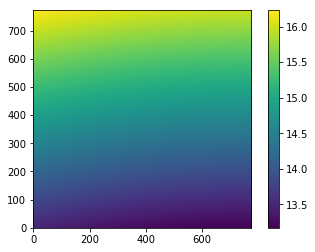

In [7]:
theta_map = astropy.io.fits.getdata('theta.fits')
pl.imshow(theta_map, origin='lower')
pl.colorbar()

Par exemple, l'angle correspondant au centre de la région 30x30 (à la position (15,15)) du ciel considéré plus haut est

In [8]:
print(theta_map[15,15], 'degrés')

13.53542 degrés


Nous allons considérer ici que l'angle au centre de la région (au pixel (15,15)) est représentatif de toute la région, qui est somme toutes assez petite.

La fonction fournie *tplib.get_cm1_axis(theta)* retourne l'axe du spectre en nombre d'onde d'un spectre calculé par FFT, pour sa moitié où les nombres d'onde sont positifs (soit la première moitié du vecteur retourné par *numpy.fft.fft*). D'un point de vue physique, seul les nombres d'onde positifs ont un sens. Le vecteur retourné par *tplib.get_cm1_axis(theta)*  a la même taille que l'interférogramme, soit 593 ici. Il faut alors trouver un moyen de représenter la moitié positive du spectre sur 593 valeurs (et non la moitié seulement, tel que serait le cas en soumettant l'interférogramme original à *numpy.fft.fft*). Une façon d'y arriver est d'ajouter des zéros (zero-padding) au bout de notre interférogramme. Cette opération n'influence pas le spectre obtenu, seulement le nombre de points où il est représenté. On peut donc ajouter 593 zéros au bout de notre interférogramme pour que *numpy.fft.fft* retourne un vecteur de longueur 1186, dont la première moitié (de 593 valeurs) correspond aux nombres d'ondes recherchés (fournie par l'appel à *tplib.get_cm1_axis(theta_map[15,15])*). La routine *numpy.fft.fft* peut faire ce *zero-padding* pour vous, via le paramètre $n$. 

**Question 5** - Effectuez cette opération et affichez la partie réelle du spectre obtenu, qui cette fois sera calibré correctement en abcisse (en $cm^{-1})). Gardez l'habitude de soustraire la moyenne de l'interférogamme (soustraire sa composante DC en quelque sorte).


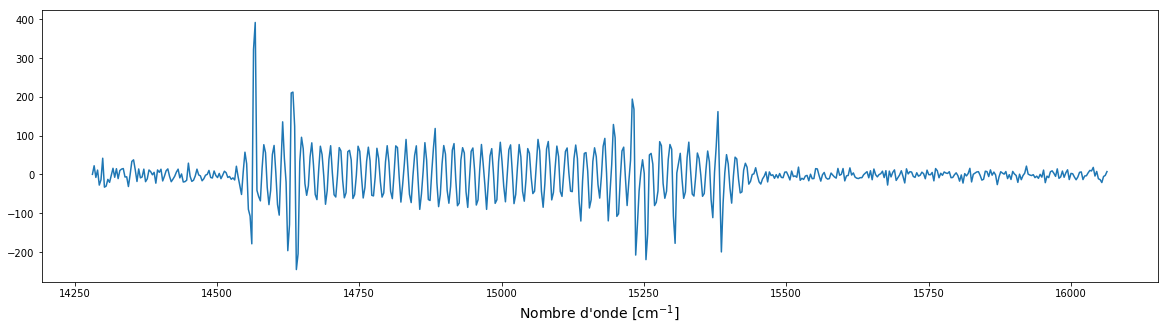

In [9]:
# On reprend le spectre dont la moyenne avait été soustraite
sky_interf_mean = sky_new_interf

"""" On fait la transformée de Fourier de l'interférogramme en ajustant la longueur de l'axe transformé 
    et on prend les 593 valeurs qui correspondent aux nombres d'onde recherchés qu'on définit freq. La
    partie réelle du spectre est affichée. """

sky_spectrum_hat = np.fft.fft(sky_interf_mean, n=1186)[0:593]

freq = tplib.get_cm1_axis(theta_map[15,15])

pl.figure(figsize=(20,5))
pl.xlabel("Nombre d'onde [cm$^{-1}$]", fontsize=14)
pl.plot(freq, sky_spectrum_hat.real)

### Correction de phase

Malheureusement, nous ne sommes pas encore au bout de nos efforts. Le spectre obtenu contient une phase non-nulle qui n'a pas été corrigée, ce qui se traduit par des valeurs aberrrantes (négatives). Cette phase correspond essentiellement au décalage $\delta x$ entre la valeur mesurée de la position du miroir mobile et la valeur réelle. Les défauts de planéité des optiques et la non-linéarité de l'indice de réfraction de la lumière en fonction de la longueur d'onde ont aussi un impact important sur le terme de phase qui n'est pas une constante mais dépend d'une façon plus ou moins complexe de la longueur d'onde et du trajet parcouru par la lumière dans l'instrument, autrement dit de son angle d'incidence.

Mathématiquement, l'interférogramme mesuré avec le décalage $\delta x$ est 

$$\hat{I}(x) = \int S(\sigma) e^{2i\pi \sigma (x + \delta x)} \text{d}\sigma$$

$$\hat{I}(x) = \int S(\sigma) e^{2i\pi \sigma x} e^{i\phi(\sigma)}\text{d}\sigma$$

avec $\phi(\sigma) = 2\pi \sigma \delta x$.

Le spectre correspondant à l'interférogramme $\hat{I}$ est

$$\hat{S}(\sigma) = \int \hat{I}(x) e^{2i\pi \sigma x} \text{d}x$$

ce qui permet de voir que $\hat{S}(\sigma)$ et $S(\sigma)$ diffèrent par un facteur $e^{i\phi(\sigma)}$:

$$\hat{S}(\sigma) =S(\sigma)e^{i\phi(\sigma)}$$

et que le spectre corrigé en phase est obtenu par
 
$$S(\sigma)=\hat{S}(\sigma)e^{-i\phi(\sigma)}.$$

Heureusement, nous pouvons mesurer cette phase directement après la transformation de Fourier à partir de ses parties réelles et imaginaires:

$$\phi(\sigma) = \tan^{-1}\left(\frac{\operatorname{Im}(\hat{S})}{\operatorname{Re}(\hat{S})}\right).$$

Le bout de code suivant calcule $\phi(\sigma)$, pour un spectre non-corrigé contenu dans la variable *sky_spectrum_hat* (la phase retournée par la fonction arctan2 étant une valeur entre  −𝜋  et  𝜋 , celle-ci doit être *déroulée* pour qu'elle fasse du sens; la fonction *numpy.unwrap()* sert exactement à ça). Le code présume que le résultat de votre transformée de Fourier est dans la variable *sky_spectrum_hat*.

Text(0, 0.5, '$\\phi(\\sigma)$')

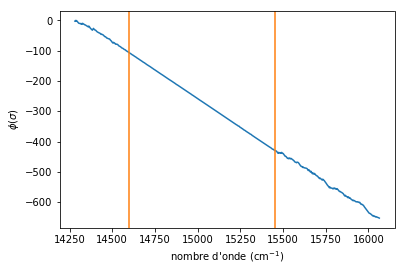

In [10]:
sky_phase = np.unwrap(np.arctan2(sky_spectrum_hat.imag, sky_spectrum_hat.real))
sky_axis = tplib.get_cm1_axis(theta_map[15,15])
pl.plot(sky_axis, sky_phase)
pl.axvline(tplib.FILTER_MIN, c='tab:orange')
pl.axvline(tplib.FILTER_MAX, c='tab:orange')
pl.xlabel("nombre d'onde (cm$^{-1}$)")
pl.ylabel("$\phi(\sigma)$")

Le graphique produit montre aussi la zone où le signal d'entrée n'est pas filtré. En dehors de cette zone, il y a très peu de signal et les valeur sont moins fiables. Aussi, nous allons utiliser une régression linéaire sur la plage des nombres d'onde situés dans la bande passante du filtre pour décrire la phase en fontion du nombre d'onde.

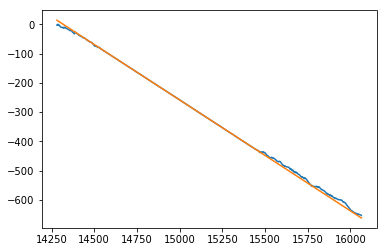

In [11]:
#indice du vecteur correspondant à la limite inférieure du filtre
index_low=int(tplib.cm12pix(tplib.FILTER_MIN, theta_map[15,15]))
#indice du vecteur correspondant à la limite supérieure du filtre
index_high=int(tplib.cm12pix(tplib.FILTER_MAX, theta_map[15,15]))

phase_coeffs = np.polyfit(sky_axis[index_low:index_high], sky_phase[index_low:index_high], 1)
sky_phase_fit = np.polyval(phase_coeffs, sky_axis)
pl.plot(sky_axis, sky_phase)
pl.plot(sky_axis, sky_phase_fit)


**Question 6** - La droite que vous avez ajustée peut-être utilisée directement comme une estimation de la phase $\phi(\sigma)$. Calculez maintenant la version corrigée en phase du spectre correspondant à la partie 'ciel' des données et affichez sa partie réelle.

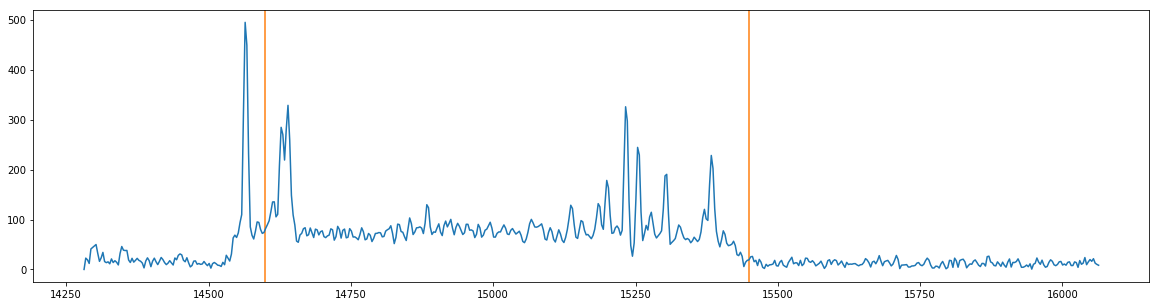

In [18]:
sky_phase_corrected = []

for f in range(len(sky_axis)):
    sky_phase_corrected.append(sky_spectrum_hat[f]*np.exp(-1j*(sky_phase[f])))


pl.figure(figsize=(20,5))
pl.axvline(tplib.FILTER_MIN, c='tab:orange')
pl.axvline(tplib.FILTER_MAX, c='tab:orange')
pl.plot(sky_axis, np.real(sky_phase_corrected))

Le spectre obtenu devrait vous permettre de reconnaître la bande spectrale permise par le filtre optique placé devant l'interféromètre. Dans cette bande, nous observons principalement des raies d'émission qui sont le résultat de la désexcitation de la molécule de OH dans la haute atmosphère. Nous voyons également de l'émission d'origine thermique en bande large (ou continue). Nous pourrions soustraire ce *background* des données propres à la nébuleuse, mais ce signal est relativement faible et nous n'en ferons rien. Nous voilà enfin prêts à s'attaquer aux données interférométriques de la nébuleuse.


## Correction du spectre de la nébuleuse

En principe, nous pourrions corriger chaque spectre du cube à partir de sa propre phase. Ce n'est cependant pas toujours possible, en particulier lorsque le spectre ne contient que quelques raies d'émission ; autrement dit lorsque le signal est faible devant le bruit dans certaines bandes de longueur d'onde. Ceci est le cas des spectres nébulaires dont l'émission se concentre dans quelques raies seulement. Nous allons donc considérer en première approximation que la phase du spectre du ciel obtenue précédemment est suffisante pour corriger tous les spectres du cube. 

**Question 7** - Écrivez une fonction qui prendra en argument une position (x,y) sur l'image ainsi que le vecteur de correction de phase $\phi$,  et qui produira un spectre corrigé en sortie (votre fonction corrigera aussi la composante *offset* des interférogrammes et retournera aussi un axe calibré en nombres d'onde selon la position du pixel considéré).

Tester votre fonction sur un interférogramme de la nébuleuse au pixel (462, 452) - ici ce sera *cube_interf[:,452,462]* - en affichant les résultats (**l'interférogramme et sa transformée de Fourier corrigée**). Notez qu'une fois la correction de phase correctement effectué seule la partie réelle du spectre obtenu nous intéresse.

In [ ]:
def corrected_spectrum(x, y, phase):
    nebuleuse_interf = cube_interf[:,x, y]
    

    

À ce stade-ci, vous devriez reconnaître les raies d'émission du soufre, de l'azote et de l'hydrogène dans le spectre.

<img src="lines.png" alt="Lines" title="Raies d'émission" width=500/>

## Mesure de la vitesse du gaz

Le gaz excité par la naine blanche au centre de la nébuleuse est animé d'une vitesse d'expansion. En effet, le gaz que l'on observe est l'atmosphère de l'étoile qui a été ejectée durant les phases précédant sa transformation en naine blanche. Cet ejecta n'étant que faiblement décéléré par le milieu interstellaire qui l'environne (dont la densité est très faible), il continue à s'étendre à la vitesse moyenne de 25 km/s [Osterbrock, 2006, p.258](https://ui.adsabs.harvard.edu/abs/2006agna.book.....O/abstract). Il se forme donc une sorte de coquille de gaz en expansion dont nous allons essayer de découvrir la forme en 3D. Pour cela, il faut pouvoir mesurer la vitesse d'expansion du gaz le long de la ligne de visée.  Pour ce faire, il suffit de mesurer les longueurs d'onde des raies d'émission ($\lambda$). Celles-ci sont décalées par rapport à leur longueur d'onde d'origine $\lambda_0$ par effet Doppler. Ce décalage peut être relié à la vitesse relative $v$ entre la source d'émission et l'observateur par la formule :

(5) $v = c\frac{\lambda - \lambda_0}{\lambda_0}$,

où $c$ est la vitesse de la lumière.

### Ajustement d'un modèle aux données spectrales

Il est pertinent ici de s'attarder sur la forme attendue d'une raie d'émission sur le spectre final, dans un cas idéal. Prenons comme exemple la lumière provenant de la désexcitation de l'hydrogène ionisé dans la nébuleuse, à 656.28 nm. Étant monochromatique, elle peut être représentée par un sinus pur qui, lorsque mesuré par SITELLE en déplaçant le miroir, produira aussi un interférogramme sinusoïdal. La transformée de Fourier d'un sinus pur est un pic de Dirac dans le spectre, à la fréquence correspondant à la raie d'hydrogène. Par contre, il faut considérer ici la méthode d'acquisition, qui utilise des incréments finis entre chaque position de miroir ainsi qu'un déplacement fini du miroir. Ces méthodes d'échantillonnage font en sorte que l'interférogramme obtenu peut être modélisé comme la multiplication d'un interférogramme complet (infini) et d'une fonction boîte, tel que montré à l'image suivante. La transformée de Fourier d'une fonction *boîte* est un sinus cardinal et, sachant, qu'une multiplication dans le domaine spatial équivaut à une convolution dans le domaine fréquenciel, la forme attendue pour la raie d'émission dans le spectre est un sinus cardinal (la convolution d'une fonction par une distribution de Dirac mènera dans le pire des cas à une translation de cette fonction).

<img src="FFT_sinc.png" alt="Lines" title="Raies d'émission" width=500/>

(image tirée de Drissen et al. Imaging Fourier Transform Spectroscopy for Astronomy, DOI: 10.5772/15485 (2011))

Nous allons donc utiliser le sinus cardinal (sinc) pour modéliser les raies sur le spectre. L'objectif ici est d'obtenir une position plus précise de la raie sur le spectre. Pour ce faire, nous allons ajuster (*fitter*) un sinus cardinal sur la raie d'intérêt, ce qui devrait nous donner une valeur plus robuste sur sa position dans le spectre que si on considérait seulement le canal contenant la valeur la plus élevée. L'ajustement ici permet d'obtenir une position avec une résolution plus grande que celle de la grille utilisée pour les nombres d'onde, en considérant non seulement le canal du maximum de la raie mais aussi les canaux voisins.  Voici le modèle à utiliser, où la mise à l'échelle nécessaire vous est fournie:

In [12]:
def model_sinc(p,x):
    """:param  x: axe du spectre en canaux (pixels)
       :param p[0]: h: hauteur de base de la raie d'émission (offset)
       :param p[1]: a: amplitude de la raie d'émission
       :param p[2]: dx: position de la raie d'émission en canaux
    """
    return p[0] + p[1] * np.sinc((x - p[2])/tplib.OVERSAMPLING_FACTOR)

**Question 8** - Réalisez un ajustement sur la raie la plus intense du spectre en utilisant la fonction *scipy.optimize.least_squares()*. Affichez le spectre d'origine ainsi que le spectre ajusté et affichez les paramètres trouvés. Vous utiliserez 25 canaux de part et d'autre du maximum de la raie pour l'ajustement, et le même pixel (462, 452) que précédemment. L'ajustement vous permettra une estimation plus précise de la position de la raie (paramètre *dx* du modèle, en unités de canal). Transformez cette position en unités de $cm^{-1}$, puis en nm pour calculer la vitesse associée à ce pixel en km/s, en utilisant l'équation Doppler. Vous pouvez utiliser les valeurs initiales suivantes pour l'ajustement: h=0, a=valeur du max, dx=position du max (canal). 

Pour plus de robustesse, vaut mieux utiliser toute l'information du spectre et pas seulement celle associée à une seule raie. Les fonctions suivantes peuvent être utilisées pour l'ajustement d'un modèle à 7 paramètres libres (la hauteur h, les amplitudes des 5 raies considérées ici, et la vitesse). La position des raies d'émission est indiquée dans a librairie tplib. Dans la même librairie se trouve une fonction de conversion des nombres d'onde au canaux (tplib.cm12pix) et la fonction inverse (tplib.pix2cm1), en fonction de la position sur l'imageur.

Ici, on considère que toutes les raies partagent la même vitesse et la même hauteur dans les spectres. Vous remarquerez que la vitesse est un paramètre du modèle ici, alors que plus tôt c'est la position dans le spectre qui était ajustée. La vitesse pour le pixel (462,452) est calculé comme exemple. Le code présume que le spectre de la nébuleuse est dans la variable *neb_spectrum*.



In [13]:
def line_shift(line, velocity): # line must be in nm
    return line * (1 + velocity / tplib.LIGHT_VEL_KMS)

def model_sinc_v(x, line, theta, h, a, v):
    return h + a * np.sinc((x - tplib.cm12pix(1e7/line_shift(line, v), theta))/tplib.OVERSAMPLING_FACTOR)
    
def residual_sinc_v(p, y, line, theta):
    return model_sinc_v(np.arange(y.size), line, theta, p[0], p[1], p[2]) - y

def model_spectrum(x, h, a, v, lines, theta):
    assert len(a) == len(lines)
    spec = np.zeros_like(x, dtype=float)
    for i in range(len(lines)):
        spec += model_sinc_v(x, lines[i], theta, 0, a[i], v)
    spec += h
    return spec

def residual_spectrum(p, y, lines, theta):
    return model_spectrum(np.arange(y.size), p[0], p[2:], p[1], lines, theta) - y.real

lines = (tplib.HA, tplib.NII_1, tplib.NII_2, tplib.SII_1, tplib.SII_2)

#paramètres initiaux
param = [0]
param += [90]
param += [1e6]*len(lines)

#ajustement sur le spectre
fit = scipy.optimize.least_squares(residual_spectrum, param, 
                                   args=(neb_spectrum, lines, theta_map[452, 462]))

print(fit.x)
print('velocity:', fit.x[1], 'km/s')
pl.plot(neb_spectrum)
pl.plot(model_spectrum(np.arange(neb_spectrum.size), fit.x[0], fit.x[2:], fit.x[1], lines, theta_map[452, 462]))
pl.xlim(140, 320)

NameError: name 'neb_spectrum' is not defined

 
Pour la suite, nous allons considérer l'image *deep_frame* (interférogramme sommés) qui vous est fournie (M57_df.fits).  Cette image servira à identifier les pixels ayant reçu assez de signal (de lumière) pour fournir un spectre avec des valeurs significatives. Nous allons aussi considérer une région d'intérêt plus étroite autour de la nébuleuse ($y\in [250:520]$ et $x\in [250:580]$), ainsi que les pixels qui ont une valeur d'au moins 5 fois la valeur médiane d'une région de ciel (sans la nébuleuse). Le code suivant identifie ces pixels pour vous.


In [ ]:
deep_frame = astropy.io.fits.getdata('M57_df.fits')
roi_map = np.zeros_like(deep_frame, dtype=bool)
roi_map[250:520, 250:580] = 1 # nebuleuse
detection_map = deep_frame >  5 * np.nanmedian(deep_frame[:100, :100])
detection_map *= roi_map
pl.imshow(detection_map, origin='lower')

## Calcul de la carte de vitesse

Vous pouvez maintenant estimer la vitesse en tout point en procédant à un ajustement du modèle sur tous les spectres du cube spectral. Pour rendre le calcul plus rapide, nous allons considérer seulement les pixels identifiés précédemment et présentant un rapport signal à bruit intéressant. 

**Question 9** - Obtenez la vitesse associée à ces pixels et présentez les résultats sous forme de carte de couleur. 



En supposant que votre carte de vitesse est dans la variable *velocity_map*, le code suivant vous permettra d'afficher les vitesses en superposition semi-transparente sur l'image *deepframe*, ce qui donne de meilleures repères visuels.

In [ ]:
alphas=np.zeros_like(deep_frame)
alphas=0.5
pl.imshow(deep_frame, cmap='gray',origin='lower',vmin=np.percentile(deep_frame, 1), vmax=np.percentile(deep_frame, 99))  
pl.imshow(velocity_map, alpha=alphas, origin='lower', vmin=np.nanpercentile(velocity_map, 1), vmax=np.nanpercentile(velocity_map, 99)) 
pl.colorbar()
pl.xlim(200, 600)
pl.ylim(200, 600)



Voilà, ceci n'est que le début de l'aventure. Pour modéliser en 3D la coquille de gaz, il faudra des efforts suppplémentaires dignes d'une maîtrise ou d'un doctorat!